Confusion Matrix 
 [[30 11]
 [16 34]]
Accuracy score 
 0.7032967032967034
Roc_Auc score 
 0.7058536585365853


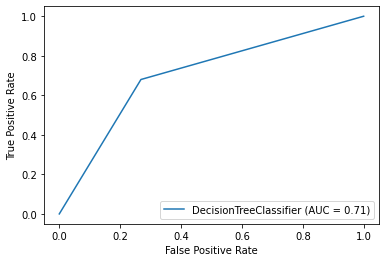

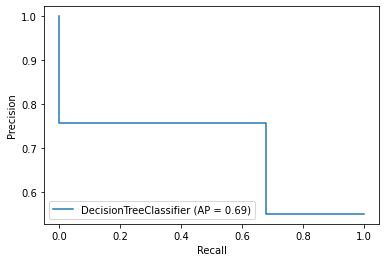

In [21]:


from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

data_file_name = "/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Classification/Data/heart.csv"
data_file = pd.read_csv(data_file_name)

col_headings = list(data_file.columns)

y = data_file.target
col_headings.pop(13)
#print(X)
#print(y)
X = data_file[col_headings]
data_file.head()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtc = DecisionTreeClassifier(criterion = "gini") 

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)
y_score = dtc.predict_proba(X_test)[:,1]

print('Confusion Matrix \n',metrics.confusion_matrix(y_test, y_pred))
print('Accuracy score \n', metrics.accuracy_score(y_test, y_pred))
print('Roc_Auc score \n',metrics.roc_auc_score(y_test,y_score))
print(metrics.plot_roc_curve(dtc,X_test,y_test))
print(metrics.plot_precision_recall_curve(dtc,X_test,y_test))






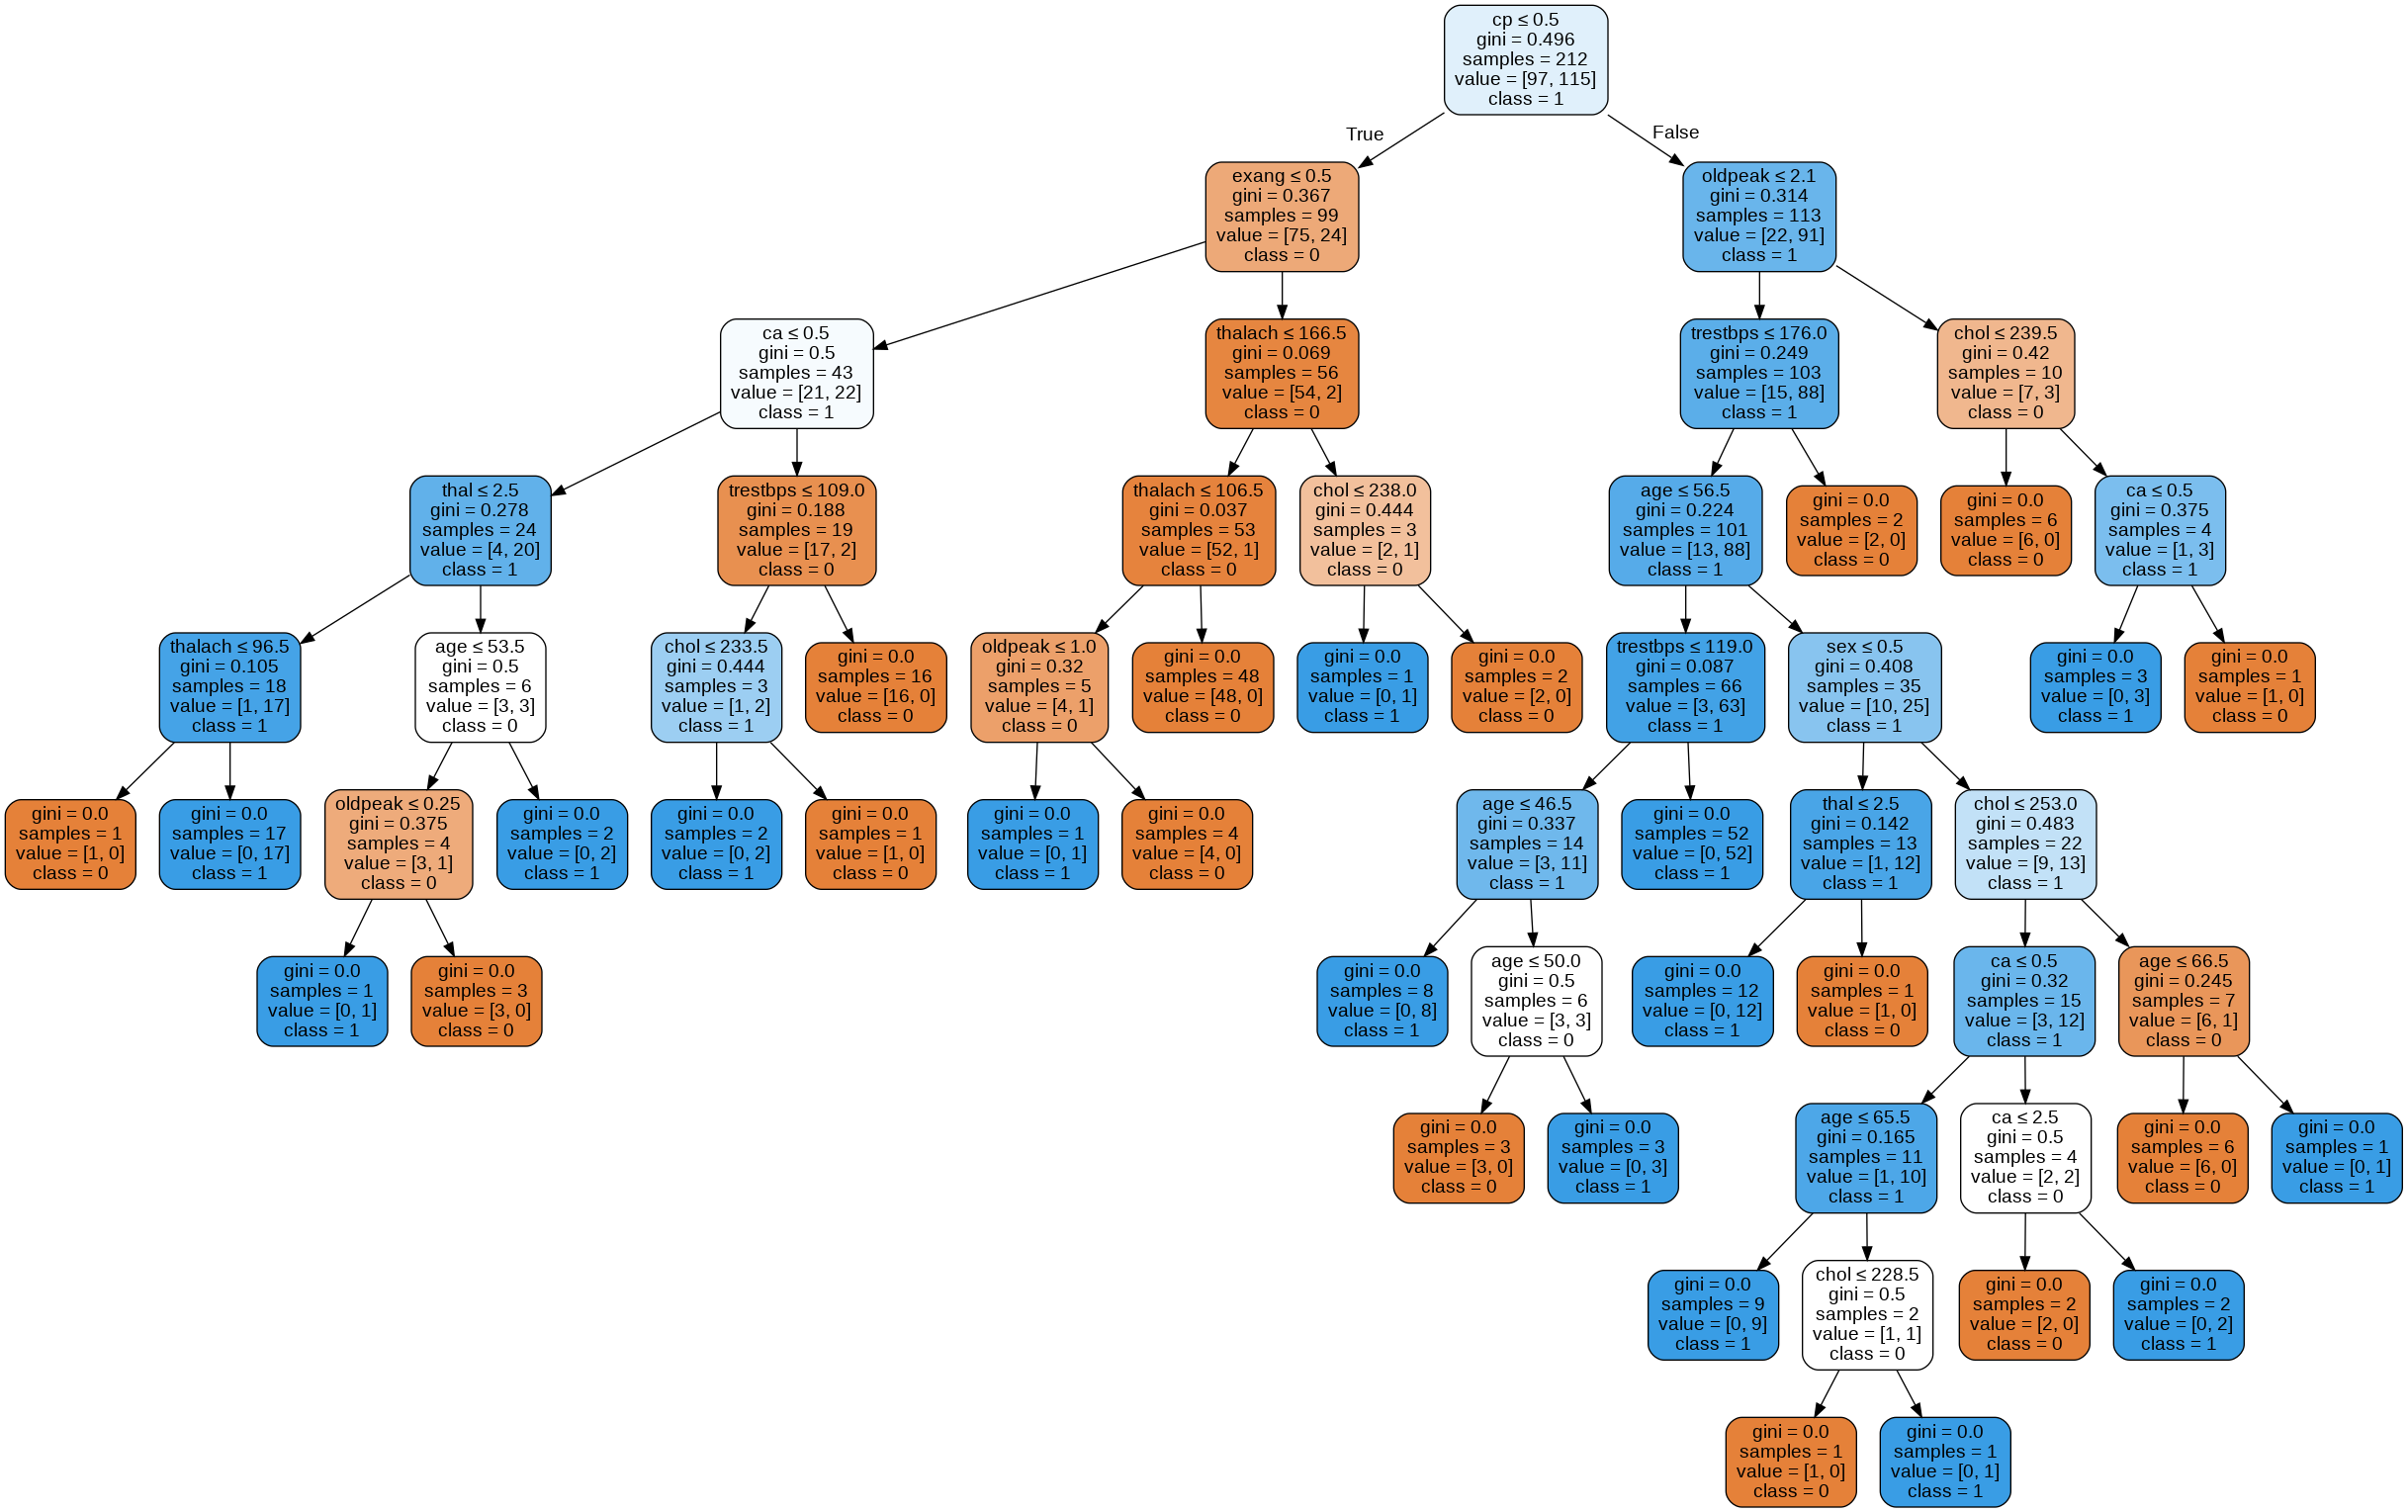

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

new_dot_file = StringIO()

export_graphviz(dtc, out_file = new_dot_file,
                filled = True, rounded = True,
                special_characters = True, feature_names = col_headings, class_names = ['0','1'])
visual = pydotplus.graph_from_dot_data(new_dot_file.getvalue())  
visual.write_png('Cancer_data_gini.png')
Image(visual.create_png())

In [17]:

dtc_e = DecisionTreeClassifier(criterion = "entropy") 

dtc_e = dtc_e.fit(X_train,y_train)

y_pred = dtc_e.predict(X_test)

print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred))

new_dot_file = StringIO()

export_graphviz(dtc, out_file = new_dot_file,
                filled = True, rounded = True,
                special_characters = True, feature_names = col_headings, class_names = ['B','M'])
visual = pydotplus.graph_from_dot_data(new_dot_file.getvalue())  
visual.write_png('Cancer_data_gini.png')
Image(visual.create_png())


Output hidden; open in https://colab.research.google.com to view.

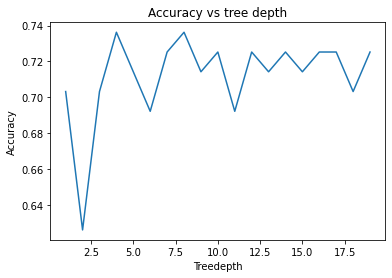

In [23]:
import matplotlib.pyplot as plt


x_axis =[]
y_axis =[]
accu = 0
for i in range(1,20):
  dtc = DecisionTreeClassifier(max_depth = i)
  dtc = dtc.fit(X_train,y_train)
  y_pred = dtc.predict(X_test)
  accu = metrics.accuracy_score(y_test, y_pred)
  x_axis.append(i)
  y_axis.append(accu)

plt.plot(x_axis,y_axis)
plt.title('Accuracy vs tree depth')
plt.xlabel('Treedepth')
plt.ylabel('Accuracy')
plt.show()